In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.formula.api as sm 
import statistics as stat
from scipy import stats
import seaborn as sns
import math

In [2]:
# set the DPI value (a larger DPI value makes a larger figure)
# for example: setting to 100 to make the IPYNB/HTML file easier to read
# for example: setting to 600 to produce higher-quality figures
FIGURE_SIZE_LEVEL = 1
plt.rcParams['figure.dpi'] = FIGURE_SIZE_LEVEL * 100

plt.rcParams['figure.autolayout'] = True

plt.rcParams['font.size'] = 16        # font size for text
plt.rcParams['axes.titlesize'] = 16   # font size for titles
plt.rcParams['axes.labelsize'] = 16   # font size for x and y labels
plt.rcParams['xtick.labelsize'] = 16  # font size for x tick labels
plt.rcParams['ytick.labelsize'] = 16  # font size for y tick labels

In [3]:
df = pd.read_csv("./movie data/dataset/movie_summary.csv")
df_weekly = pd.read_csv("./movie data/dataset/weekly_boxoffice.csv")

### Category and Revenue 

In [21]:
filtered_df = df[
    (df['production_budget'] != 0) &
    (df['production_year'] > 2000) &
    df['genre'].notna() &
    df['domestic_box_office'].notna() &
    df['international_box_office'].notna()
].copy()

filtered_df["total_box_office"] = filtered_df["domestic_box_office"] + filtered_df["international_box_office"]
filtered_df["flattened_production_budget"] = np.power(filtered_df["production_budget"], 1/4)
filtered_df["flattened_total_box_office"] = np.power(filtered_df["total_box_office"], 1/4)

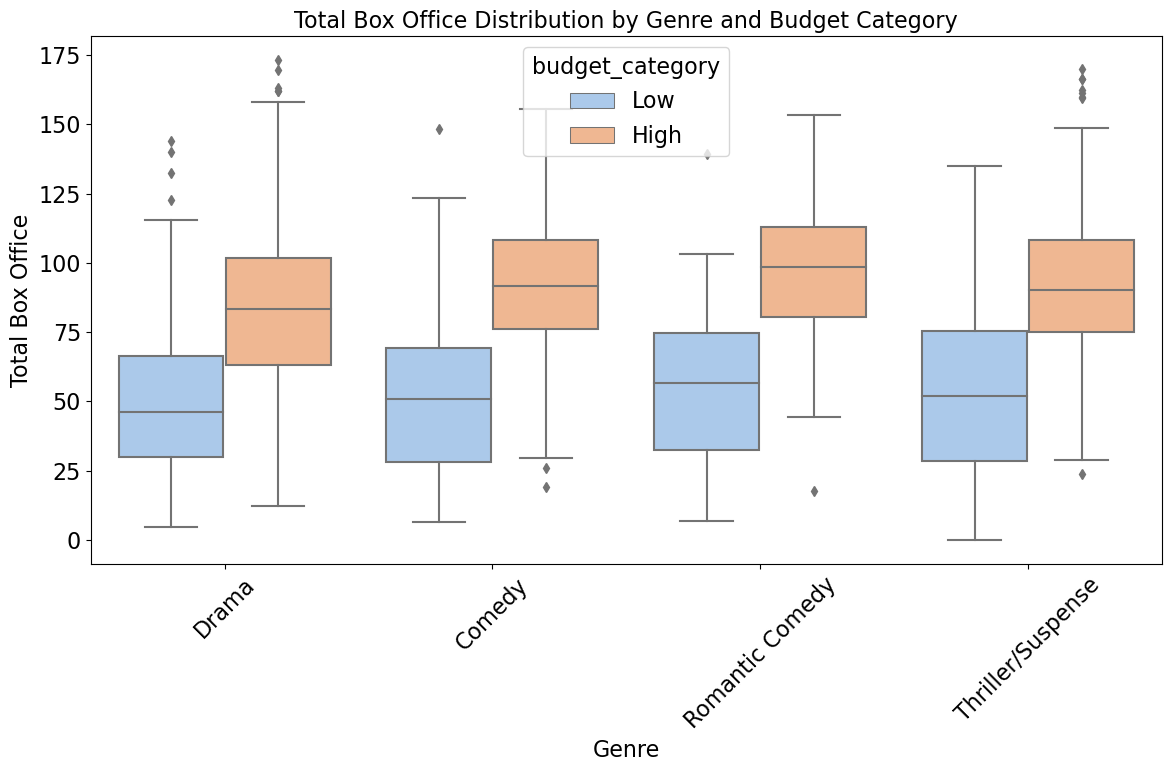

In [22]:
# Filter for the four genres
selected_genres = ['Romantic Comedy', 'Thriller/Suspense', 'Comedy', 'Drama']

filtered_df['budget_category'] = pd.cut(
    filtered_df['production_budget'], 
    bins=[0, 15000000, np.inf], 
    labels=['Low', 'High']
)

budget_low = filtered_df[filtered_df['budget_category'] == 'Low']['flattened_total_box_office']
budget_high = filtered_df[filtered_df['budget_category'] == 'High']['flattened_total_box_office']

# Draw boxplot for selected genres only
filtered_selected = filtered_df[filtered_df['genre'].isin(selected_genres)]

plt.figure(figsize=(12, 8))
sns.boxplot(
    x='genre',
    y='flattened_total_box_office',
    hue='budget_category',
    data=filtered_selected,
    palette='pastel'
)
plt.title('Total Box Office Distribution by Genre and Budget Category')
plt.xlabel('Genre')
plt.ylabel('Total Box Office')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

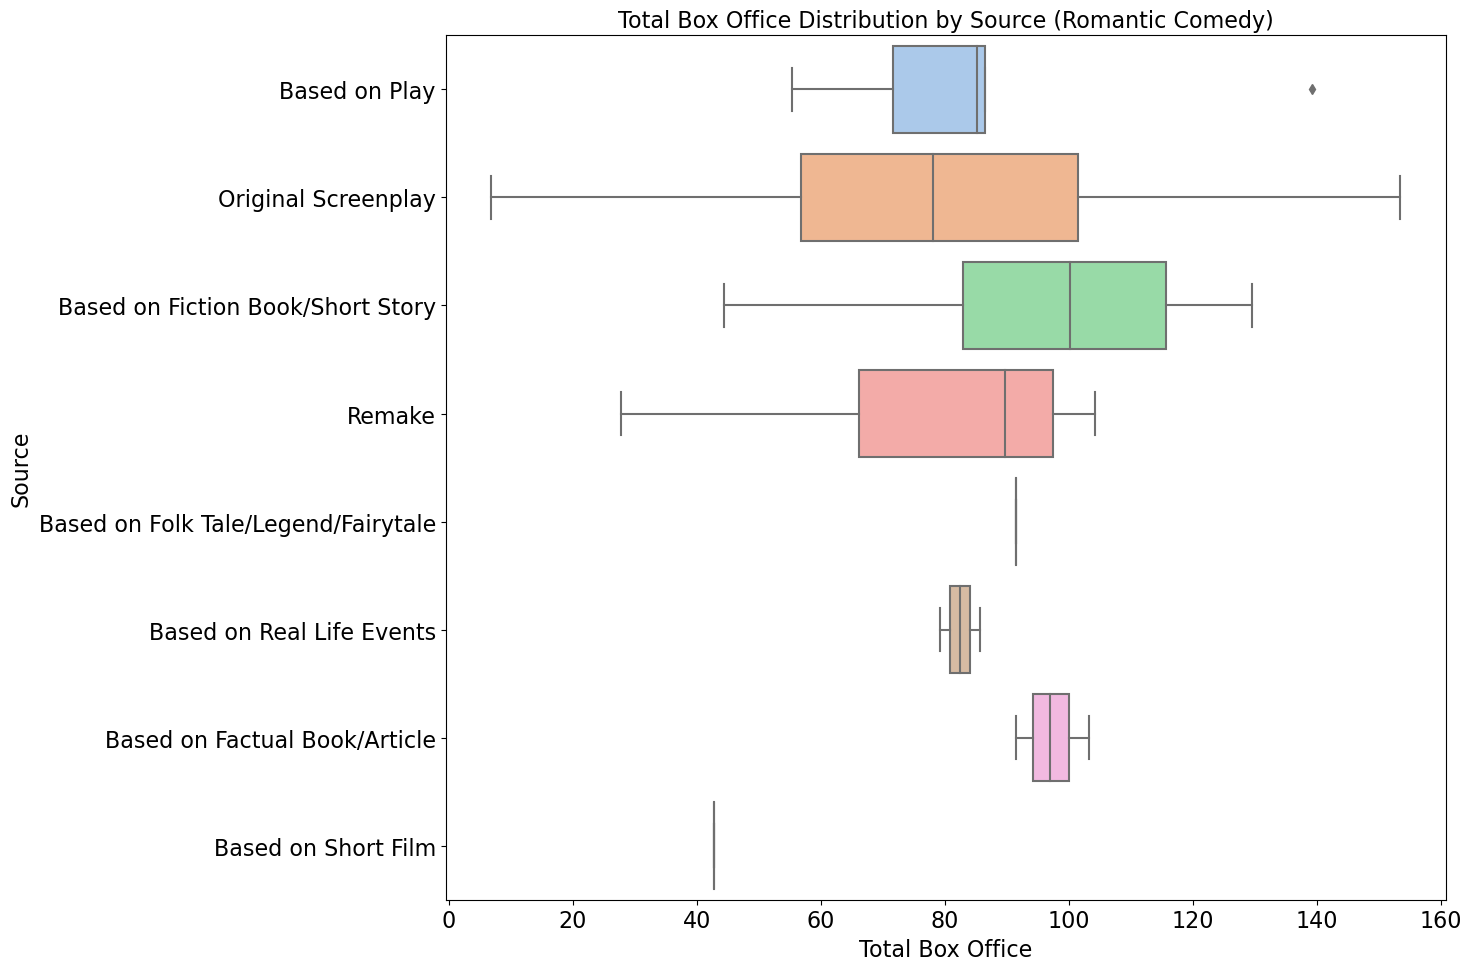

Number of movies in Romantic Comedy by source:
Original Screenplay                    136
Based on Fiction Book/Short Story       21
Based on Play                            6
Remake                                   6
Based on Factual Book/Article            3
Based on Real Life Events                2
Based on Folk Tale/Legend/Fairytale      1
Based on Short Film                      1
Name: source, dtype: int64




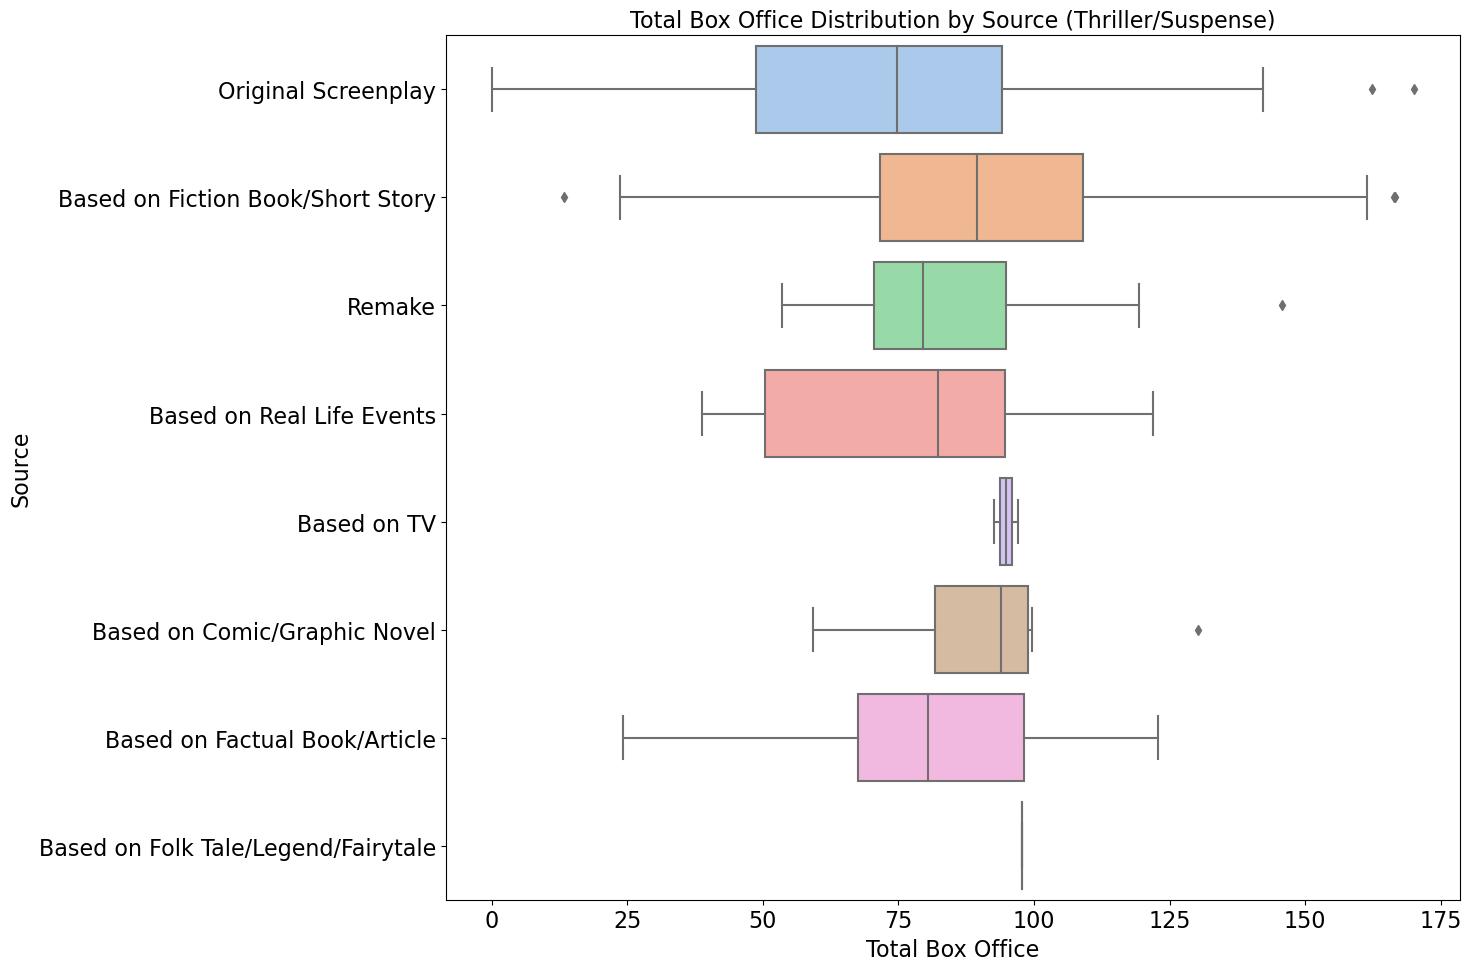

Number of movies in Thriller/Suspense by source:
Original Screenplay                    270
Based on Fiction Book/Short Story       94
Remake                                  19
Based on Real Life Events               12
Based on Comic/Graphic Novel             6
Based on Factual Book/Article            5
Based on TV                              2
Based on Folk Tale/Legend/Fairytale      1
Name: source, dtype: int64




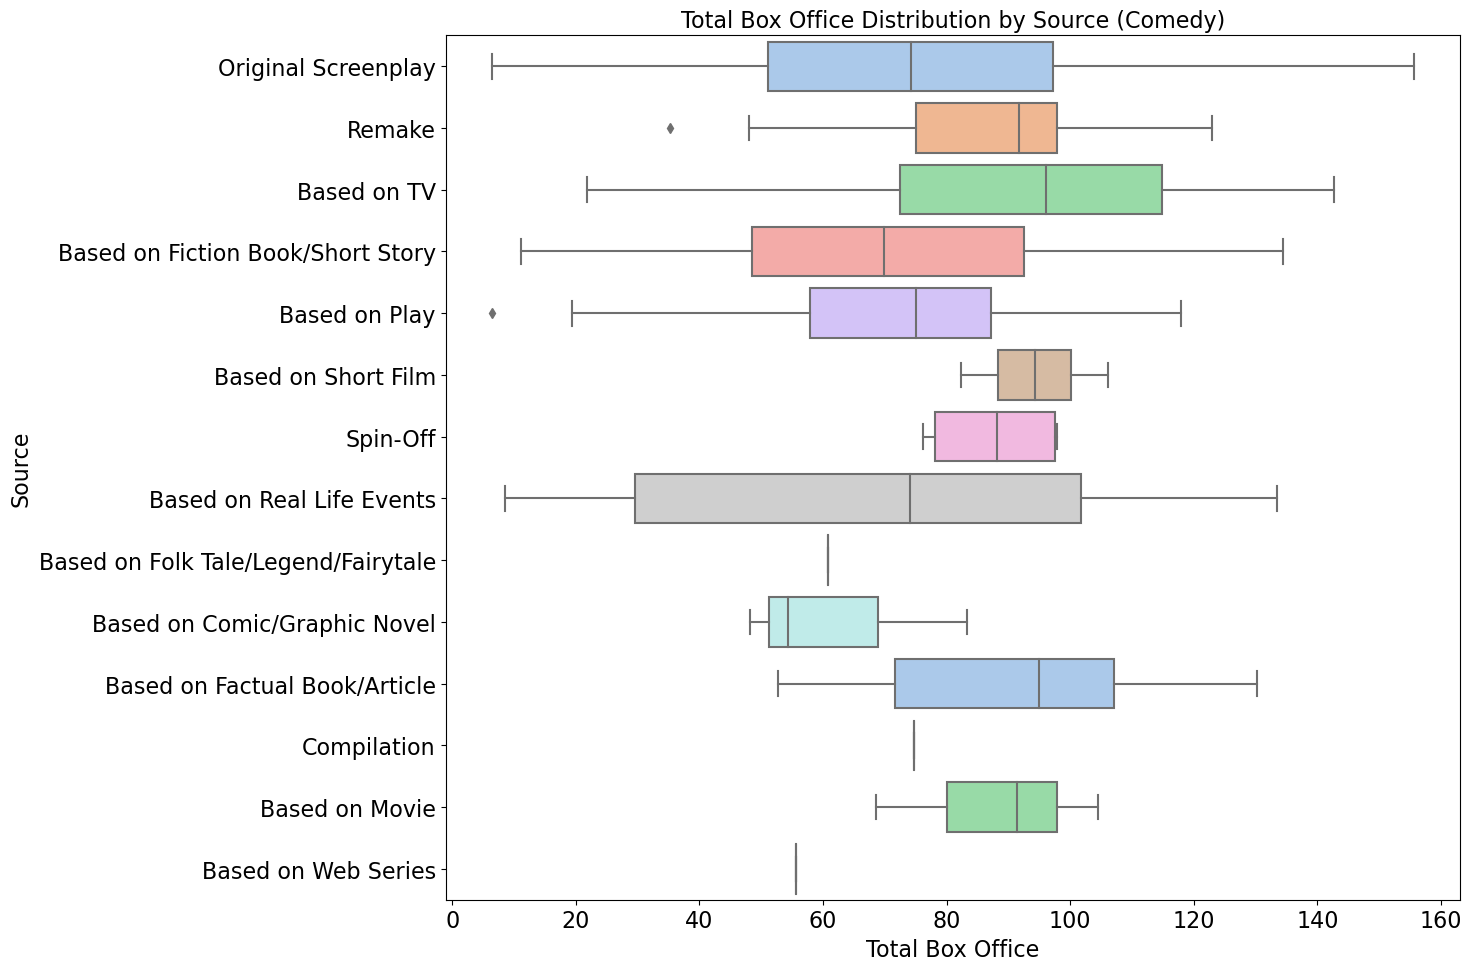

Number of movies in Comedy by source:
Original Screenplay                    494
Based on Fiction Book/Short Story       51
Remake                                  27
Based on TV                             27
Based on Play                           16
Based on Real Life Events                8
Based on Factual Book/Article            8
Spin-Off                                 4
Based on Comic/Graphic Novel             3
Based on Movie                           3
Based on Short Film                      2
Based on Folk Tale/Legend/Fairytale      1
Compilation                              1
Based on Web Series                      1
Name: source, dtype: int64




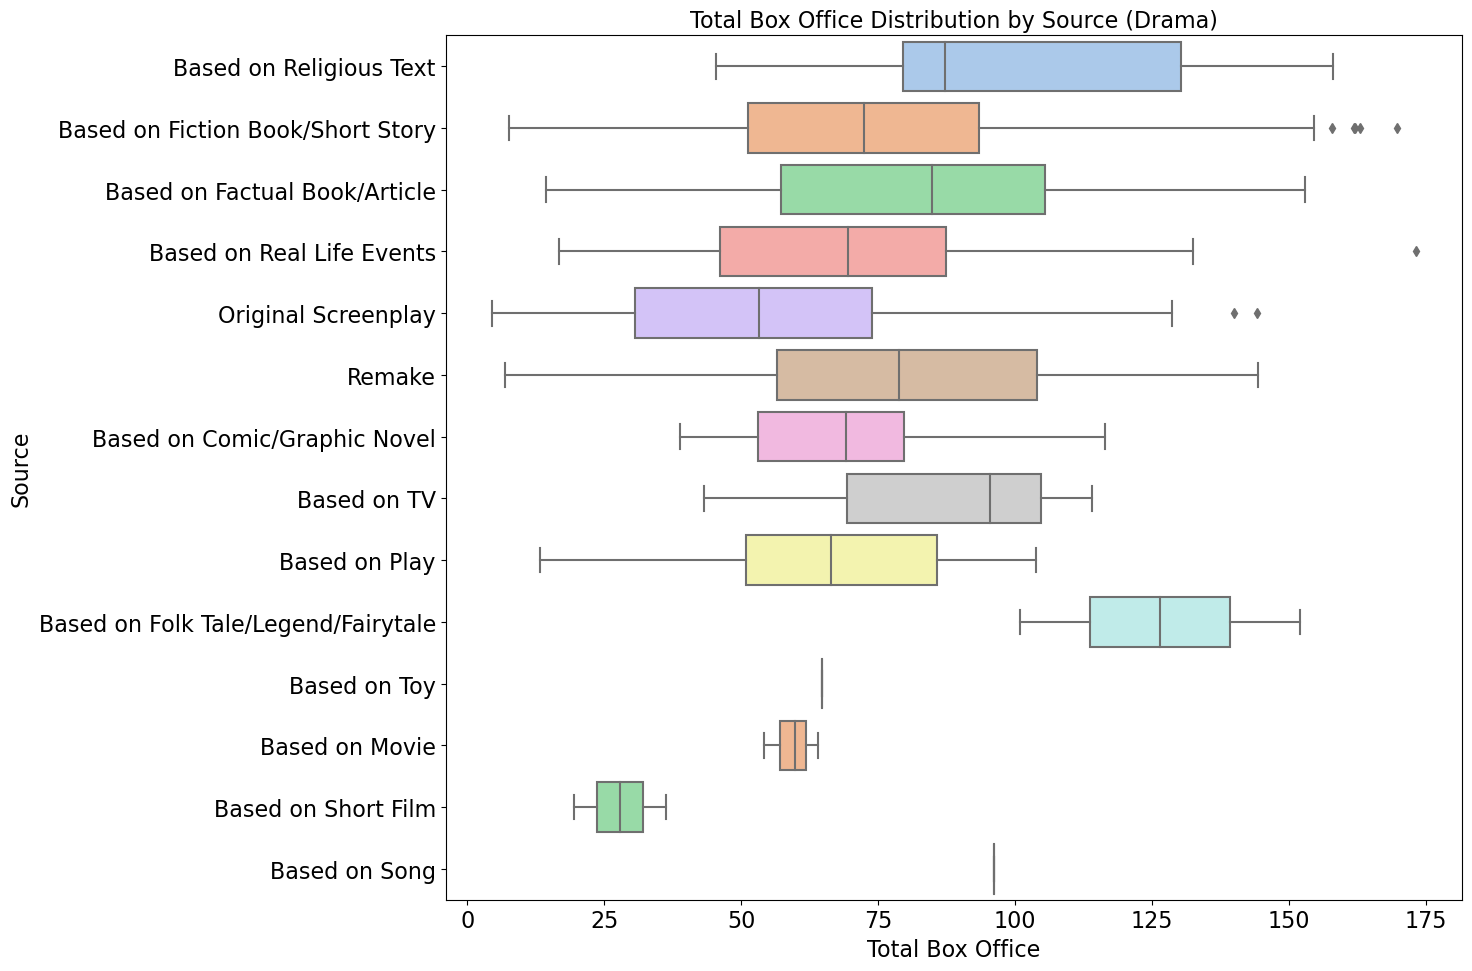

Number of movies in Drama by source:
Original Screenplay                    447
Based on Fiction Book/Short Story      250
Based on Real Life Events              189
Based on Factual Book/Article           71
Based on Play                           26
Remake                                  19
Based on Religious Text                  8
Based on Comic/Graphic Novel             7
Based on TV                              3
Based on Movie                           3
Based on Folk Tale/Legend/Fairytale      2
Based on Short Film                      2
Based on Toy                             1
Based on Song                            1
Name: source, dtype: int64




In [25]:
for genre in selected_genres:
    plt.figure(figsize=(15, 10))
    sns.boxplot(
        y='source',
        x='flattened_total_box_office',
        data=filtered_df[filtered_df['genre'] == genre],
        palette='pastel'
    )
    plt.title(f'Total Box Office Distribution by Source ({genre})')
    plt.ylabel('Source')
    plt.xlabel('Total Box Office')
    plt.tight_layout()
    plt.show()

    # print the number of movies in each source
    print(f"Number of movies in {genre} by source:")
    print(filtered_df[filtered_df['genre'] == genre]['source'].value_counts())
    print("\n")

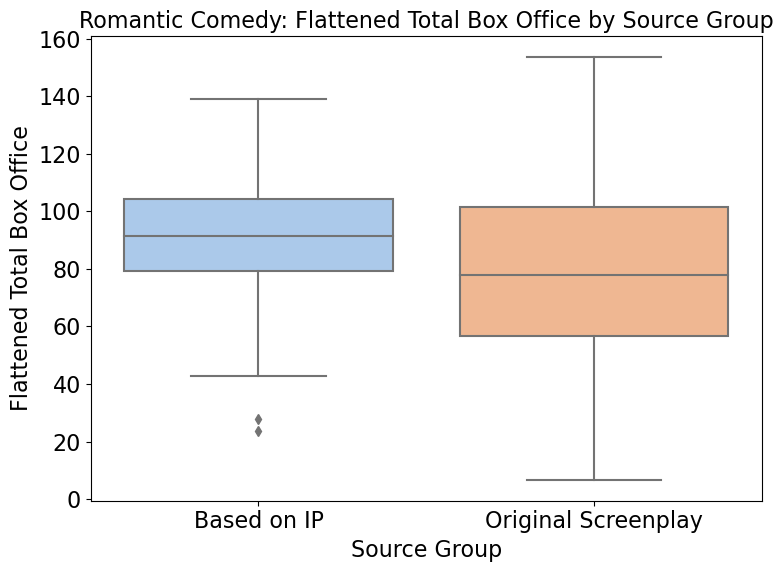

Romantic Comedy - Original Screenplay: n = 136
Romantic Comedy - Based on IP: n = 41


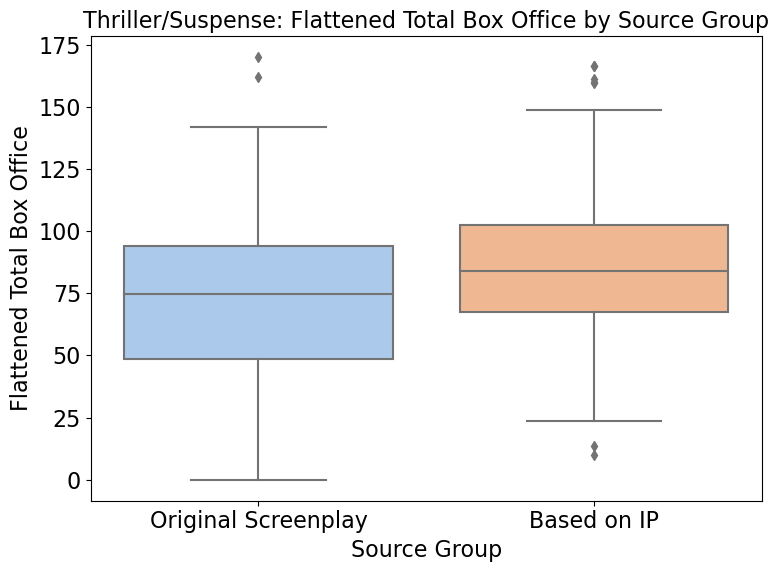

Thriller/Suspense - Original Screenplay: n = 270
Thriller/Suspense - Based on IP: n = 144


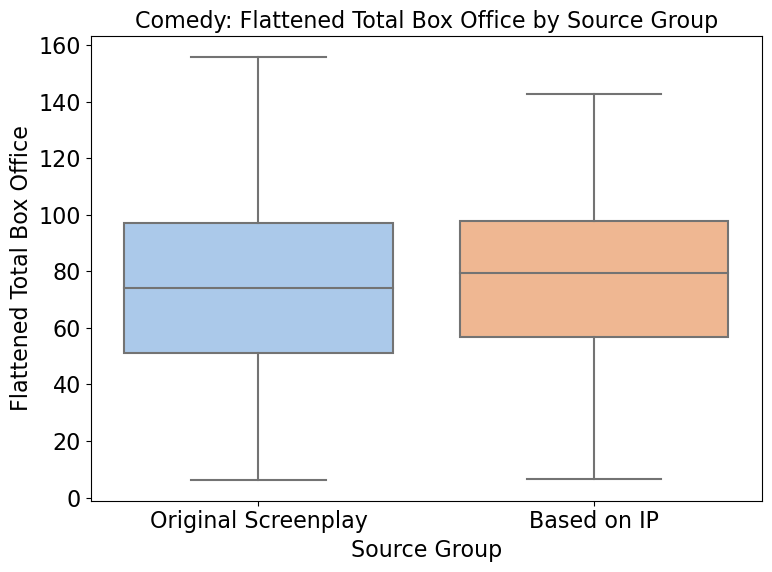

Comedy - Original Screenplay: n = 494
Comedy - Based on IP: n = 158


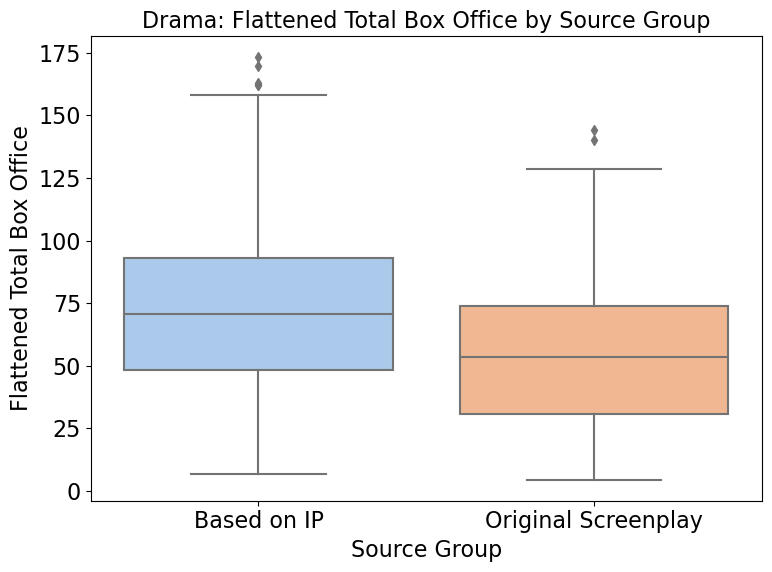

Drama - Based on IP: n = 602
Drama - Original Screenplay: n = 447


In [29]:
for genre in selected_genres:
    # Create a new column for grouping source
    genre_df = filtered_df[filtered_df['genre'] == genre].copy()
    genre_df['source_group'] = np.where(
        genre_df['source'] == 'Original Screenplay',
        'Original Screenplay',
        'Based on IP'
    )
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(
        x='source_group',
        y='flattened_total_box_office',
        data=genre_df,
        palette='pastel'
    )
    plt.title(f'{genre}: Flattened Total Box Office by Source Group')
    plt.xlabel('Source Group')
    plt.ylabel('Flattened Total Box Office')
    plt.tight_layout()
    plt.show()
    # Print sample size for each group
    for group, n in genre_df['source_group'].value_counts().items():
        print(f"{genre} - {group}: n = {n}")